# House Pricing

## Problem Statement

We would like to predict the house of a house based on its characteristics.

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv("house_prices.csv")
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df=df[df["TotalSF"]<6000]

In [3]:
# Data Preparation
X = df[['TotalSF']] # pandas DataFrame
y = df["SalePrice"] # pandas Series

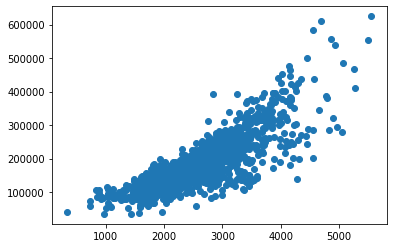

In [4]:
plt.scatter(X,y)

## Linear Regression with Sklearn

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
reg = LinearRegression()

In [7]:
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
reg.coef_

array([83.79128706])

In [9]:
reg.predict([ [3500] ])

array([259695.552062])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [12]:
train_test_split?

In [13]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
pred=reg.predict(X_test)

In [15]:
#y_test

In [16]:
np.mean(np.abs(y_test-pred))

33687.64542462718

In [17]:
from sklearn.metrics import mean_absolute_error

In [18]:
mean_absolute_error(y_test,pred)

33687.645424627175

In [19]:
np.mean(np.abs(y_test-pred)/y_test)

0.1987348040558154

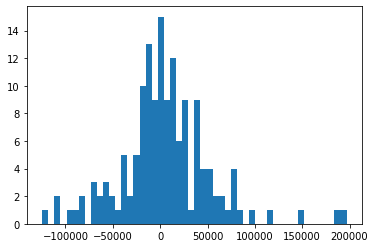

In [20]:
plt.hist(y_test-pred,bins=50);

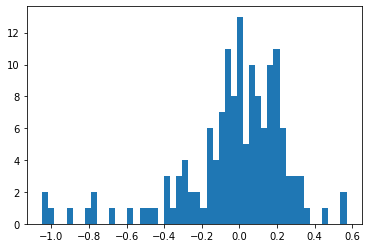

In [21]:
plt.hist((y_test-pred)/y_test,bins=50);

In [22]:
xgrid = [ [i] for i in np.linspace(1000,5000,1000)]

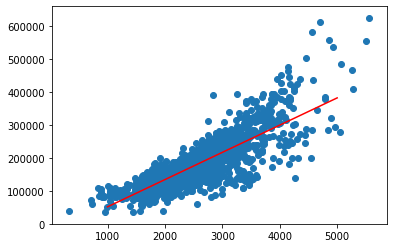

In [23]:
plt.plot(xgrid,reg.predict(xgrid),color="red")
plt.scatter(X,y);

## K Neighbors Regressor

In [24]:
from sklearn.neighbors import KNeighborsRegressor

In [25]:
regk = KNeighborsRegressor(n_neighbors=4)

In [26]:
regk.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')

In [27]:
mean_absolute_error(y_test,regk.predict(X_test))

35203.75171232877

One advantage of KNN is that you can use it for any kind of function, it does not need to be linear

In [28]:
xt = np.linspace(0,10,100)
yt= sin(xt)

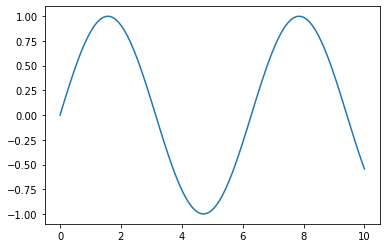

In [29]:
plt.plot(xt,yt)

In [30]:
np.corrcoef(xt,yt)[0][1]

-0.07589466694797199

### Error evolution with number of neighbors

In [31]:
maes=[]
for i in range(4,100):
    regk = KNeighborsRegressor(n_neighbors=i)
    regk.fit(X_train,y_train)
    maes.append(mean_absolute_error(y_test,regk.predict(X_test)))

In [32]:
np.mean(y_train)

179885.538579068

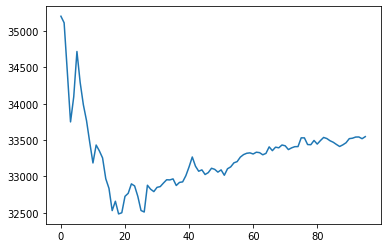

In [33]:
plt.plot(maes)

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
np.sqrt(mean_squared_error(y_test,regk.predict(X_test)))

51580.17455057197

## Cross Validation

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [38]:
cross_val_score(regk,X,y,cv=5,scoring="neg_mean_absolute_error").mean()

-30356.937686139747

In [39]:
from sklearn.neighbors import KNeighborsRegressor

In [40]:
regk = KNeighborsRegressor(n_neighbors=19)

In [41]:
cross_val_score(regk,X,y,cv=5,scoring="neg_mean_absolute_error").mean()

-30450.566467715682

In [42]:
regl = LinearRegression()
cross_val_score(regl,X,y,cv=5,scoring="neg_mean_absolute_error").mean()

-31053.225860573915

In [43]:
reg_final = LinearRegression()
reg_final.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Grid Search CV

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
reg = GridSearchCV(KNeighborsRegressor(),
                  param_grid={"n_neighbors":np.arange(4,100)},
                  cv=5,
                  scoring="neg_mean_absolute_error")

In [46]:
reg.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88,
       89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg

In [47]:
reg.best_params_

{'n_neighbors': 82}

In [48]:
reg.best_score_

-30197.346752158242

In [49]:
reg_final = reg.best_estimator_

In [50]:
reg_final

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=82, p=2,
                    weights='uniform')

## Decision Tree Regressor

In [51]:
from sklearn.tree import DecisionTreeRegressor

In [52]:
regd = DecisionTreeRegressor(max_depth=5)

In [53]:
cross_val_score(regd,X,y,cv=5,scoring="neg_mean_absolute_error").mean()

-31645.312498536532

In [54]:
reg = GridSearchCV(DecisionTreeRegressor(),
                  param_grid={"max_depth":np.arange(2,8),
                              "min_samples_leaf":[10,30,50,100]},
                  cv=5,
                  scoring="neg_mean_absolute_error")

In [55]:
reg.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'min_samples_leaf': [10, 30, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
      

In [56]:
reg.best_score_

-30439.471232279666

In [57]:
reg.best_params_

{'max_depth': 4, 'min_samples_leaf': 30}

### Randomized Search CV

In [58]:
from sklearn.model_selection import RandomizedSearchCV

In [59]:
RandomizedSearchCV?

In [60]:
reg = RandomizedSearchCV(DecisionTreeRegressor(),
                  param_distributions={"max_depth":np.arange(2,8),
                              "min_samples_leaf":[10,30,50,100]},
                  cv=5,
                  scoring="neg_mean_absolute_error",
                  n_iter=5      )

In [61]:
reg.fit(X,y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeRegressor(criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort=False,
                                                   random_state=None,
                                                   splitter='best'),
                   iid='warn', n_iter=5, n_jobs=None,
                   param_dis

In [62]:
reg.best_score_

-30599.0478935937

In [63]:
reg.best_params_

{'min_samples_leaf': 10, 'max_depth': 4}

### Creating your own scorer

In [64]:
# Correlation
def corr_test(y_test,pred):
    return np.corrcoef(y_test,pred)[0][1]

In [79]:
from sklearn.metrics import make_scorer
cross_val_score(regd,X,y,cv=5,scoring=make_scorer(corr_test))

array([0.7598205 , 0.84881072, 0.81543759, 0.8205446 , 0.7659969 ])

In [78]:
cross_val_score

<function sklearn.model_selection._validation.cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv='warn', n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score='raise-deprecating')>

In [66]:
reg = GridSearchCV(DecisionTreeRegressor(),
                  param_grid={"max_depth":np.arange(2,8),
                              "min_samples_leaf":[10,30,50,100]},
                  cv=5,
                  scoring=make_scorer(corr_test))

In [67]:
reg.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'min_samples_leaf': [10, 30, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
      

In [68]:
reg.best_params_

{'max_depth': 3, 'min_samples_leaf': 10}

### Drawing the Decision Tree

In [69]:
from IPython.display import Image

In [70]:
from sklearn.tree import export_graphviz

In [71]:
import pydotplus
#from string import String

ModuleNotFoundError: No module named 'pydotplus'

In [ ]:
import io
dot_data = io.StringIO()

In [ ]:
export_graphviz(reg.best_estimator_, out_file=dot_data,filled=True, rounded=True,
 special_characters=True)

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [ ]:
from IPython.display import Image
Image(graph.create_png())

In [ ]:
plt.plot(xgrid,reg.best_estimator_.predict(xgrid),color="red")
plt.scatter(X,y);